# Comparing direct evolution to sesolve

In [1]:
%matplotlib inline

import numpy as np
from qutip import *
import LH_tools
import matplotlib.pyplot as plt
import adiabatic_sim 
from IPython.display import display



## Direct method
using the evolution given by $|\psi(t)> = e^{-i H(t) dt(t)} |\psi(t-1)>$ we get the expected behavior specified in RC01 paper.

/home/oryonatan/anaconda3/envs/qutip_dev/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:243: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip_dev/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:161: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip_dev/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


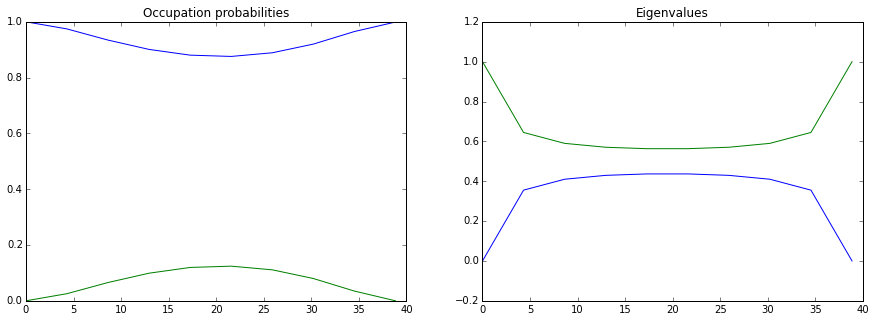

In [2]:
n = 6
N = 2**n


id_n = tensor([qeye(2)]*n)
psi0 = tensor([basis(2,0)]*n)
psi0= hadamard_transform(n)*psi0
H_0 = id_n-psi0*psi0.trans()
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H_0, psi0)

# Generate the state we are looking for
w = tensor([basis(2,0),basis(2,1),basis(2,0),basis(2,0),basis(2,1),basis(2,0)])

#Define final hamiltonian
H_1 = id_n - w*w.trans()

##Using roland

eps = 0.3
s = lambda t : LH_tools.s_function(t,N,eps)
tmax = LH_tools.find_s_one(N,eps)
tlist = np.linspace(0, tmax , 10)

P_mat, evals_mat,psis_sim = adiabatic_sim.sim_simple_adiabatic(tlist, H_0, H_1 ,s)

LH_tools.plot_PandEV(P_mat, evals_mat, tlist)
pass


### Now using sesolve

Two different ways to compute the evolution :

1.Changing the time list

2.The coupling as function of time

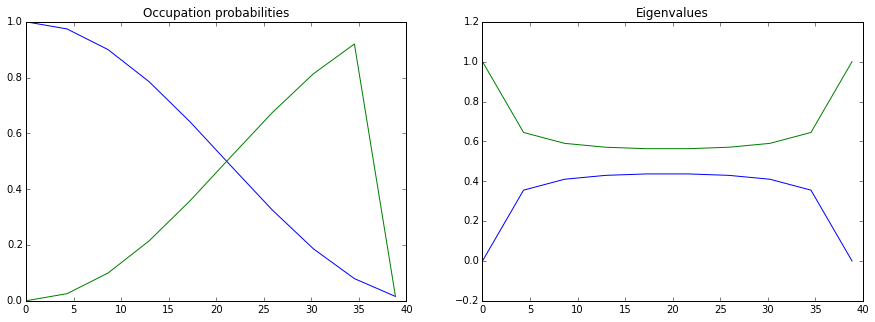

In [39]:
from importlib import reload; reload(LH_tools)

h_s= [[H_0,'1-1/2*(1-(np.sqrt(N - 1) * np.tan((2 * t * epsilon * np.sqrt(N - 1) - N * np.arctan(np.sqrt(N - 1))) / N))/(1-N))'],
      [H_1, '1/2*(1-(np.sqrt(N - 1) * np.tan((2 * t * epsilon * np.sqrt(N - 1) - N * np.arctan(np.sqrt(N - 1))) / N))/(1-N))']]
args = {'t_max':tmax, 'N':N, 'epsilon': eps}
P_mat,EV_mat,psis_qutip = LH_tools.simulate_adiabatic_process2(tlist, h_s, args ,psi0, False)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
plt.show()

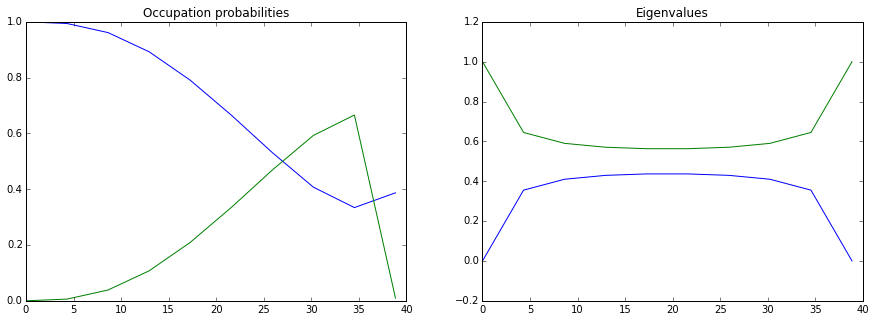

In [42]:
args = {'t_max':tmax}

h_s= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
slist = s(tlist) *  tmax
P_mat,EV_mat,psis_qutip = LH_tools.simulate_adiabatic_process2(slist, h_s, args ,psi0, False)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
plt.show()

We can see that the occupation probabilities are different between the two methods
However the eigenvalues are just the same.

### Compare some random hamiltonian
we can see that the computed hamiltonians in the process are identical

In [5]:
t_test  = tlist[5] 
args = {'t_max':tmax, 'N':N, 'epsilon': eps}
sim_H = Qobj.evaluate(h_s,t_test,args)
sesolve_H = H_0 * (1 - s(t_test)) + H_1 * (s(t_test ))

display(sim_H)
display(sesolve_H)
(sim_H-sesolve_H).norm()

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = [64, 64], type = oper, isherm = True
Qobj data =
[[ 0.99305556 -0.00694444 -0.00694444 ..., -0.00694444 -0.00694444
  -0.00694444]
 [-0.00694444  0.99305556 -0.00694444 ..., -0.00694444 -0.00694444
  -0.00694444]
 [-0.00694444 -0.00694444  0.99305556 ..., -0.00694444 -0.00694444
  -0.00694444]
 ..., 
 [-0.00694444 -0.00694444 -0.00694444 ...,  0.99305556 -0.00694444
  -0.00694444]
 [-0.00694444 -0.00694444 -0.00694444 ..., -0.00694444  0.99305556
  -0.00694444]
 [-0.00694444 -0.00694444 -0.00694444 ..., -0.00694444 -0.00694444
   0.99305556]]

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = [64, 64], type = oper, isherm = True
Qobj data =
[[ 0.99234696 -0.00765304 -0.00765304 ..., -0.00765304 -0.00765304
  -0.00765304]
 [-0.00765304  0.99234696 -0.00765304 ..., -0.00765304 -0.00765304
  -0.00765304]
 [-0.00765304 -0.00765304  0.99234696 ..., -0.00765304 -0.00765304
  -0.00765304]
 ..., 
 [-0.00765304 -0.00765304 -0.00765304 ...,  0.99234696 -0.00765304
  -0.00765304]
 [-0.00765304 -0.00765304 -0.00765304 ..., -0.00765304  0.99234696
  -0.00765304]
 [-0.00765304 -0.00765304 -0.00765304 ..., -0.00765304 -0.00765304
   0.99234696]]

0.089989268363671521

However, the evolved state differs:

In [6]:
display( psis_sim[5] )
display( psis_qutip[5])

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1]], shape = [64, 1], type = ket
Qobj data =
[[ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.50930663-0.666979j  ]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0.06762285-0.01102397j]
 [ 0

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1]], shape = [64, 1], type = ket
Qobj data =
[[ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [-0.1735456+0.34776129j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.0266024+0.11299387j]
 [ 0.026602

# Now comparing linear evolution
We can see that in the linear case, the two methods are equivalent.

/home/oryonatan/anaconda3/envs/qutip_dev/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:243: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip_dev/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:161: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip_dev/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


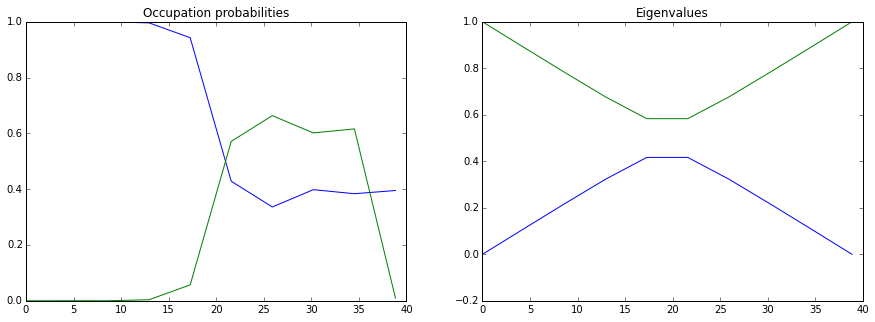

In [7]:
P_mat, evals_mat,psis_sim = adiabatic_sim.sim_simple_adiabatic(tlist, H_0, H_1)
LH_tools.plot_PandEV(P_mat, evals_mat, tlist)
plt.show()

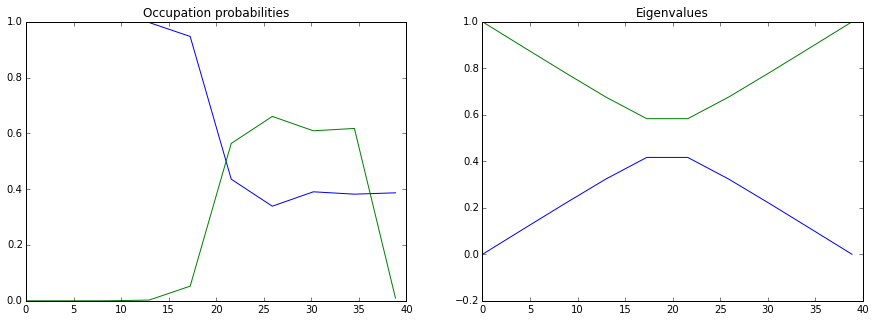

In [8]:
h_s= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
args = {'t_max':tmax}
P_mat,EV_mat,psis_qutip = LH_tools.simulate_adiabatic_process2(tlist, h_s, args ,psi0, False)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
plt.show()